# Lab 6.03 - Regression analysis

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

C:\Users\32468\AppData\Local\Temp\ipykernel_25324\1793403083.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd                                 # Dataframe


## Exercise 3: Movies of 2006 and 2007

1. The file Movies_2006_2007 contains information on over 200
movies that were released during 2006 and 2007.

In [25]:
movies = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Movies_2006_2007.csv', delimiter = ";", encoding='cp1252')
# Show the first few records of the Data Frame
movies.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,$22 707 121,$32 109 139,$39 517 763,$11 000 000,$15 909 367,$16 000 000
1,2.0,Year of the Dog,Paramount Vantage,Drama,$141 803,$318 598,$1 540 141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,$12 839 402,NaN,$22 466 994,$18 200 000,$27 040 983,$25 000 000
3,4.0,Stomp the Yard,Sony Pictures,Drama,$28 263 594,$42 853 277,$61 356 221,$15 000 000,$33 166 898,$14 000 000
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,$39 868 642,$44 407 533,$38 189 217,$16 500 000


2. Use cols_with_dollars to transform the amounts in dollars into floats.
For ease of use, change the values into 'million dollar' - values.  
E.g. $22 707 121	becomes 22.707121.  


In [16]:
cols_with_dollars = ['7-day Gross',	'14-day Gross',	'Total US Gross',	'International Gross',	'US DVD Sales',	'Budget']

In [26]:
for c in cols_with_dollars:
  movies[c] = movies[c].str.replace('$', '').str.replace(' ','').astype(float) / 1000000
movies.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,22.707121,32.109139,39.517763,11.000000,15.909367,16.0
1,2.0,Year of the Dog,Paramount Vantage,Drama,0.141803,0.318598,1.540141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,12.839402,NaN,22.466994,18.200000,27.040983,25.0
3,4.0,Stomp the Yard,Sony Pictures,Drama,28.263594,42.853277,61.356221,15.000000,33.166898,14.0
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,39.868642,44.407533,38.189217,16.5


3. Create two scatterplots: one of Total US Gross (Y) versus
7-day Gross (X) and one of Total US Gross (Y)
versus 14-day Gross (X).

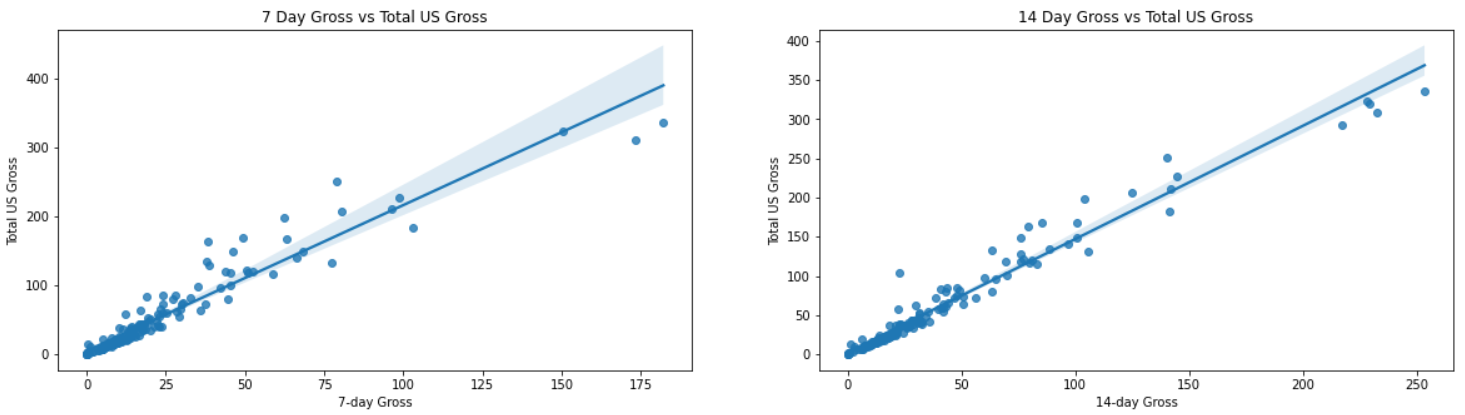

Text(0.5, 1.0, '14-day Gross vs Total US Gross')

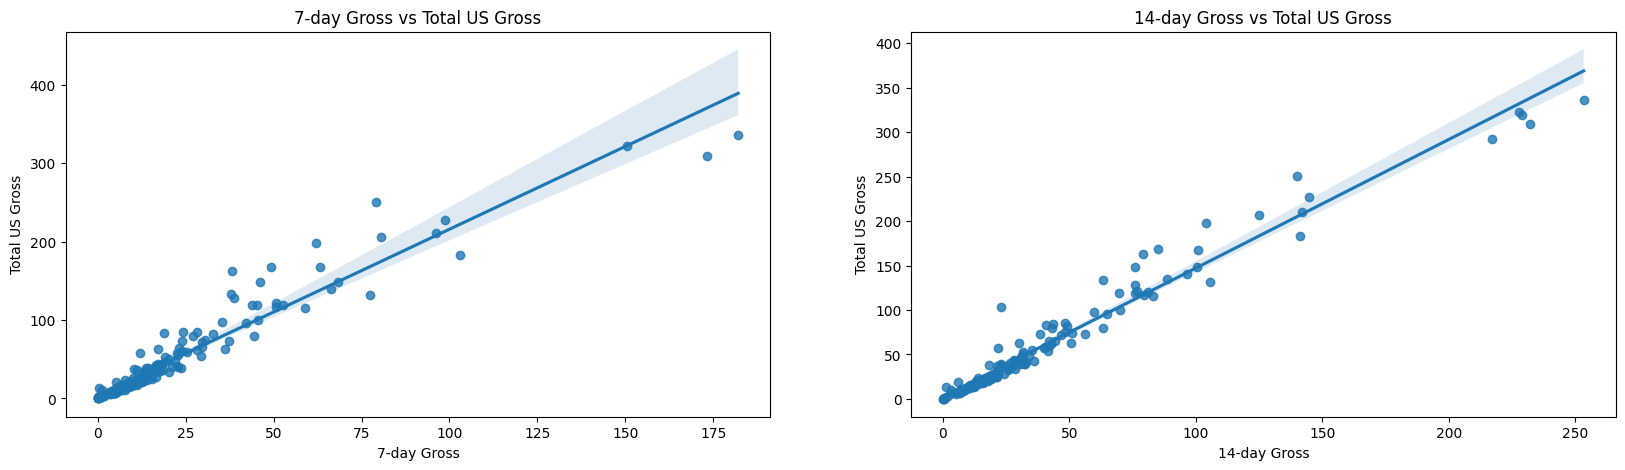

In [11]:
fig, axs = plt.subplots(1,2, figsize=(20,5))
sns.regplot(ax = axs[0], x = movies['7-day Gross'], y = movies['Total US Gross'])
axs[0].set_title('7-day Gross vs Total US Gross')

sns.regplot(ax = axs[1], x = movies['14-day Gross'], y = movies ['Total US Gross'])
axs[1].set_title('14-day Gross vs Total US Gross')

4. What are the corresponding
values for $R$ and $R^2$?

R (7 Day Gross vs Total US Gross) = 0.959407544414305  
R² (7 Day Gross vs Total US Gross) = 0.9204628362790865  
R (14 Day Gross vs Total US Gross) = 0.9813238689021966  
R² (14) Day Gross vs Total US Gross) = 0.9629965356771755

In [27]:
# NaN waarden wegfilteren (enkel voor de records dat nodig zijn!)

mvs_7days = movies.dropna(subset = ['7-day Gross', 'Total US Gross'])
mvs_14days = movies.dropna(subset = ['14-day Gross', 'Total US Gross'])

In [32]:
# we vervangen de dataset nu door de mvs_7 / mvs_14

cor = np.corrcoef(mvs_7days['7-day Gross'], mvs_7days['Total US Gross'])[0][1]
print(f'R = {cor:.4f}')
print(f'R² = {cor **2:.4f}')

cor = np.corrcoef(mvs_14days['14-day Gross'], mvs_14days['Total US Gross'])[0][1]
print(f'R = {cor:.4f}')
print(f'R² = {cor **2:.4f}')

R = 0.9594
R² = 0.9205
R = 0.9813
R² = 0.9630


In [ ]:
# Conclussie
# R > 0 => stijgend verband
# R ~ 0.9 => uitzonderlijk sterk verband

# R² ~ 0.9 => uitzonderlijk sterk verband

# de varaintie van de afhankelijk veranderlijke wordt 
# voor meer dan 90% bepaald door de onafhankelijk veranderlijke.

5. What are the equations of the linear regression lines in the previous part?  
What exactly does intercept and slope tell you about the movie business?

7 days gross: ŷ = 4.590921233818129 + 2.113464756610182 * x  
14 days gross: ŷ = 2.44900289255105 + 1.4464530702590803 * x

In [36]:
# 7-day gross

x = mvs_7days['7-day Gross']
y = mvs_7days['Total US Gross']
a,b = np.polyfit(x,y,1)
print(f'7-day Gross: y = {a} * x + {b}')


7-day Gross: y = 2.113464756610182 * x + 4.590921233818133


In [38]:
# 14-day gross

x = mvs_14days['14-day Gross']
y = mvs_14days['Total US Gross']
a,b = np.polyfit(x,y,1)
print(f'14-day Gross: y = {a} * x + {b}')

14-day Gross: y = 1.4464530702590805 * x + 2.449002892551064


6. In the previous scatterplots you can see some ouliers at the right side. These are movies that did great
during their first week or two. 
* 6.1 Make a boxplot to visualize the outliers for the first week or two.

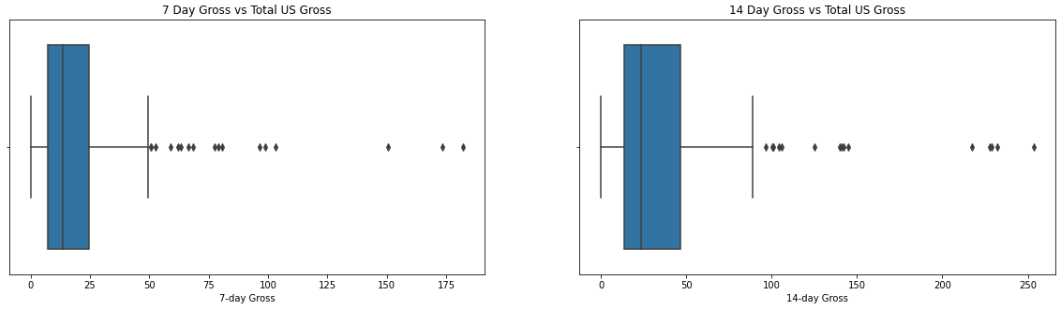

Text(0.5, 1.0, '14-day Gross vs Total US Gross')

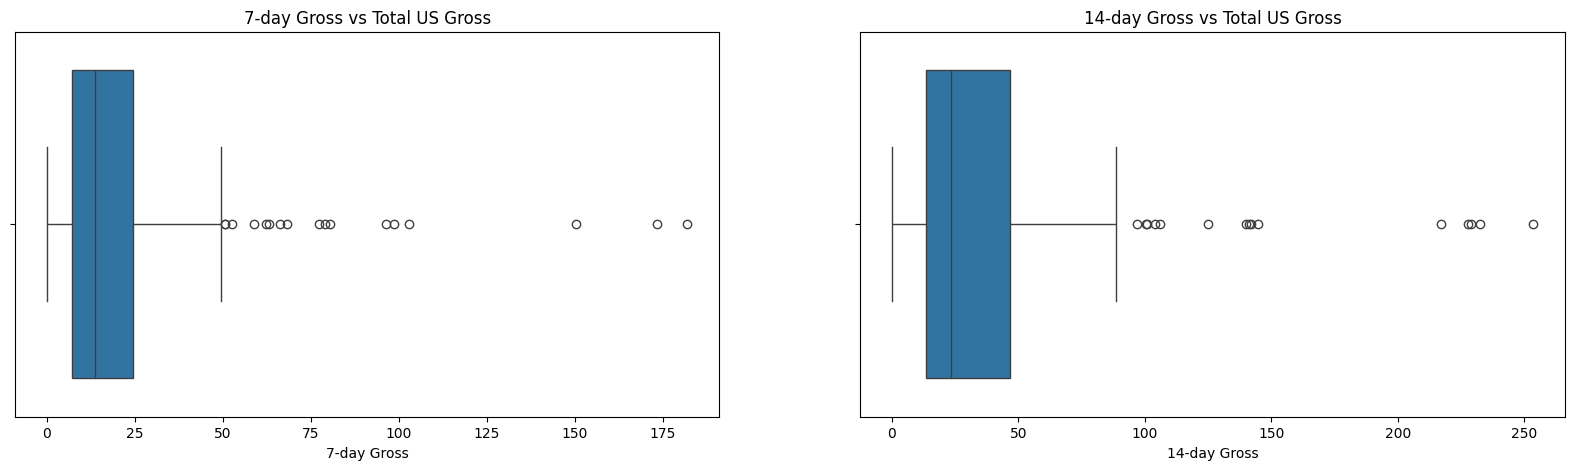

In [39]:
fig, axs = plt.subplots(1,2, figsize=(20,5))
sns.boxplot(ax = axs[0], x = mvs_7days['7-day Gross'])
axs[0].set_title('7-day Gross vs Total US Gross')

sns.boxplot(ax = axs[1], x = mvs_14days['14-day Gross'])
axs[1].set_title('14-day Gross vs Total US Gross')

* 6.2 Calculate the upper limit values for the first week or two.

limit_7_days_gross is 50.376637875  
limit_14_days_gross is 96.2906745

In [47]:
interkwartiel_afstand = mvs_7days['7-day Gross'].quantile(.75) - mvs_7days['7-day Gross'].quantile(.25)
limit_7 = mvs_7days['7-day Gross'].quantile(.75) + 1.5 * interkwartiel_afstand


interkwartiel_afstand = mvs_14days['14-day Gross'].quantile(.75) - mvs_14days['14-day Gross'].quantile(.25)
limit_14 = mvs_14days['14-day Gross'].quantile(.75) + 1.5 * interkwartiel_afstand

print (f'limit_7_days_gross: {limit_7},\nlimit_14_days_gross: {limit_14}')

limit_7_days_gross: 50.376637875,
limit_14_days_gross: 96.2906745


* 6.3 What are the outliers for the first week or two?

A few movies for the first week: 

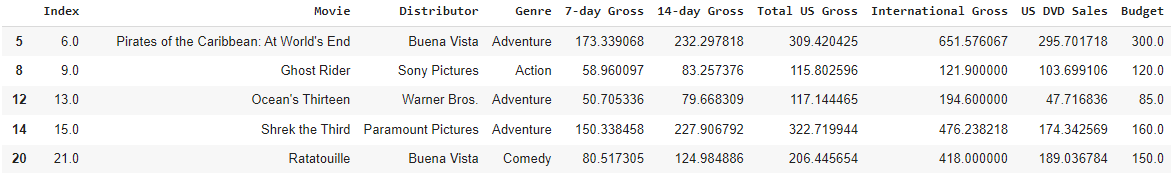

In [49]:
mvs_7days[mvs_7days['7-day Gross'] >= limit_7].head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
5,6.0,Pirates of the Caribbean: At World's End,Buena Vista,Adventure,173.339068,232.297818,309.420425,651.576067,295.701718,300.0
8,9.0,Ghost Rider,Sony Pictures,Action,58.960097,83.257376,115.802596,121.900000,103.699106,120.0
12,13.0,Ocean's Thirteen,Warner Bros.,Adventure,50.705336,79.668309,117.144465,194.600000,47.716836,85.0
14,15.0,Shrek the Third,Paramount Pictures,Adventure,150.338458,227.906792,322.719944,476.238218,174.342569,160.0
20,21.0,Ratatouille,Buena Vista,Comedy,80.517305,124.984886,206.445654,418.000000,189.036784,150.0


* 6.4 Remove the outliers out of the dataset.

In [50]:
mvs_7days = mvs_7days[mvs_7days['7-day Gross'] <= limit_7]
mvs_14days = mvs_14days[mvs_14days['7-day Gross'] <= limit_14]

* 6.5 Give the new values for $R$ and $R^2$.


R (7 Day Gross vs Total US Gross)= 0.9324792650689281  
R² (7 Day Gross vs Total US Gross) = 0.8695175797834882

R (14 Day Gross vs Total US Gross)= 0.9584258717658031  
R² (14) Day Gross vs Total US Gross) = 0.9185801516700396

In [53]:
# we vervangen de dataset nu door de mvs_7 / mvs_14

cor = np.corrcoef(mvs_7days['7-day Gross'], mvs_7days['Total US Gross'])[0][1]
print(f'R = {cor:.4f}')
print(f'R² = {cor **2:.4f}')

cor = np.corrcoef(mvs_14days['14-day Gross'], mvs_14days['Total US Gross'])[0][1]
print(f'R = {cor:.4f}')
print(f'R² = {cor **2:.4f}')

R = 0.9325
R² = 0.8695
R = 0.9789
R² = 0.9583


In [ ]:
# Conclussie
# R > 0 => stijgend verband
# R ~ 0.9 => uitzonderlijk sterk verband

# R² ~ 0.9 => uitzonderlijk sterk verband

# de variantie van de afhankelijk veranderlijke wordt 
# voor meer dan 90% bepaald door de onafhankelijk veranderlijke.

* 6.6 Give the new values for the slope and the intercept of the regression lines. Do the outliers have a great effect?


7 days gross: ŷ = -5.073945979380596 + 2.7456809688135646 * x  
14 days gross: ŷ = -3.227354951096885 + 1.6529869503645318 * x

In [60]:
# regression lines

x = mvs_7days['7-day Gross']
y = mvs_7days['Total US Gross']
a,b = np.polyfit(x,y,1)
print(f'7-day Gross: y = {a} * x + b {b}')

7-day Gross: y = 2.745680968813563 * x + b -5.073945979380608


In [ ]:
# regression lines

x = mvs_14days['14-day Gross']
y = mvs_14days['Total US Gross']
a,b = np.polyfit(x,y,1)
print(f'14-day Gross: y = {a} * x + b {b}')